<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

## Описание проекта

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».

Описание тарифов

Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Задача**: Выяснить какой тариф приносит больше денег.

Импортируем необходимые библиотеки:

In [6]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Изучение данных из файла

Изучим информацию о каждой из таблиц, типах данных, диапазоне значений:

In [7]:
def get_data(path):
    df = pd.read_csv(path)
    display(df.info())
    display(df.head())
    display(df.describe().T)
    try: 
        del df['Unnamed: 0'] #удаление лишнего столбца при наличии
    except KeyError:
        print('Unnamed: 0 не обнаружено лишних столбцов')
        print('')
        
    print('столбцов: ', len(df.columns), df.columns) 
        
    for i in range(0, len(df.columns)):
        print('')
        print('уникальные значения столбца ', i)
        print(df.iloc[:,i].unique())
        print('')
    return df

Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [8]:
calls = get_data('/datasets/calls.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Unnamed: 0 не обнаружено лишних столбцов

столбцов:  4 Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

уникальные значения столбца  0
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']


уникальные значения столбца  1
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08

Таблица internet (информация об интернет-сессиях):
    
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [9]:
internet = get_data('/datasets/internet.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


столбцов:  4 Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

уникальные значения столбца  0
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']


уникальные значения столбца  1
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]


уникальные значения столбца  2
['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '

После удаления лишнего столбца:

In [10]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


In [11]:
messages = get_data('/datasets/messages.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Unnamed: 0 не обнаружено лишних столбцов

столбцов:  3 Index(['id', 'message_date', 'user_id'], dtype='object')

уникальные значения столбца  0
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']


уникальные значения столбца  1
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '201

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [12]:
tariffs = get_data('/datasets/tariffs.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Unnamed: 0 не обнаружено лишних столбцов

столбцов:  8 Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

уникальные значения столбца  0
[  50 1000]


уникальные значения столбца  1
[15360 30720]


уникальные значения столбца  2
[ 500 3000]


уникальные значения столбца  3
[ 550 1950]


уникальные значения столбца  4
[200 150]


уникальные значения столбца  5
[3 1]


уникальные значения столбца  6
[3 1]


уникальные значения столбца  7
['smart' 'ultra']



Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [13]:
users = get_data('/datasets/users.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Unnamed: 0 не обнаружено лишних столбцов

столбцов:  8 Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

уникальные значения столбца  0
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 

**Вывод:** выполнен подробный обзор содержимого таблиц, необходимо привести столбцы даты к дата типу. В одной из таблиц удален лишний столбец с индексами. Аномалий и пропусков данных не обнаружено.

## Подготовка данных

Приведем данные к нужным типам;
Найдем и исправим ошибки в данных.

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Приведем столбец с датой к нужному типу

In [14]:
calls.call_date = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Проверим за какой период времени собраны данные

In [15]:
calls.call_date.max() - calls.call_date.min() 

Timedelta('364 days 00:00:00')

Округлим секунды до минут. 

Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 

In [16]:
calls.duration = np.ceil(calls.duration)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [17]:
calls.duration.value_counts()

0.0     39613
7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
12.0     8448
1.0      8402
13.0     7486
14.0     6554
15.0     5505
16.0     4551
17.0     3671
18.0     2984
19.0     2411
20.0     1806
21.0     1304
22.0      975
23.0      720
24.0      468
25.0      363
26.0      257
27.0      151
28.0      104
29.0       56
30.0       39
31.0       30
32.0       17
33.0       10
35.0        5
34.0        3
38.0        2
36.0        2
37.0        2
Name: duration, dtype: int64

Обратим внимание, что длительность многих звонков — 0.0 минут. 

Это могут быть пропущенные звонки. Оценим, как их отсутствие повлияет на результаты анализа.

In [18]:
print('Всего звонков ', calls.duration.count())
print('Доля пропущенных звонков {:.5%}'.format(calls[calls['duration']==0].count().shape[0] / calls.duration.count()))
print('средняя длительность без учета пропущенных: ', calls.duration.mean())
print('средняя длительность c учетом пропущенных: ', calls[calls['duration']!=0].duration.mean())

Всего звонков  202607
Доля пропущенных звонков 0.00197%
средняя длительность без учета пропущенных:  7.158197890497367
средняя длительность c учетом пропущенных:  8.897879676552511


Доля пропущенных звонков не существенна, их наличие влияет на средние длительности звонков, для анализа используется суммарные длительности по месяцам, оставим данные как есть.

Сгруппируем звонки для каждого пользователя по месяцам:

In [19]:
calls['month'] = calls.call_date.dt.month

In [20]:
calls_grouped = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_grouped.columns = ['count_call', 'sum_call_duration']
calls_grouped

count_call  sum_call_duration
user_id month                               
1000    5              22              159.0
        6              43              172.0
        7              47              340.0
        8              52              408.0
        9              58              466.0
...                   ...                ...
1498    10             41              247.0
1499    9               9               70.0
        10             68              449.0
        11             74              612.0
        12             69              492.0

[3174 rows x 2 columns]

Сгруппируем сообщения для каждого пользователя по месяцам:

In [21]:
messages.message_date = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages.message_date.dt.month

In [22]:
sms_grouped = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
sms_grouped.columns = ['count_sms']
sms_grouped

count_sms
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

Приведем столбец с датой к нужному типу

In [23]:
internet.session_date = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Округлим мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [24]:
internet['month'] = internet.session_date.dt.month

Сгруппируем трафик для каждого пользователя по месяцам:

In [25]:
internet_grouped = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_grouped.columns = ['sum_mb']
internet_grouped['sum_gb'] = np.ceil(internet_grouped.sum_mb / 1024)
internet_grouped

sum_mb  sum_gb
user_id month                  
1000    5       2253.49     3.0
        6      23233.77    23.0
        7      14003.64    14.0
        8      14055.93    14.0
        9      14568.91    15.0
...                 ...     ...
1498    10     20579.36    21.0
1499    9       1845.75     2.0
        10     17788.51    18.0
        11     17963.31    18.0
        12     13055.58    13.0

[3203 rows x 2 columns]

Проверим на аномалии:

In [39]:
internet.mb_used.value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Обратим внимание на сессии с нулевым трафиком, возможно зафиксированы сессии при отсутствии интернет соединения, проверим их долю.

In [41]:
print('Всего сессий ', internet.mb_used.count())
print('Доля сессий с нулевым трафиком {:.5%}'.format(internet[internet['mb_used']==0].count().shape[0] / internet.mb_used.count()))
print('средний объем трафика без учета нулевых сессий: ', internet.mb_used.mean())
print('средний объем трафика c учетом нулевых сессий: ', internet[internet['mb_used']!=0].mb_used.mean())

Всего сессий  149396
Доля сессий с нулевым трафиком 0.00335%
средний объем трафика без учета нулевых сессий:  370.1924263701839
средний объем трафика c учетом нулевых сессий:  426.08721035763267


Доля нулевых сессий не существенна, их наличие влияет на средние объемы трафика, оставим данные как есть.

Соединим таблицы

In [26]:
call_internet_pivot = calls_grouped.merge(internet_grouped, how='outer', left_index=True, right_index=True)
int_call_sms_pivot = call_internet_pivot.merge(sms_grouped, how='outer', left_index=True, right_index=True)

int_call_sms_pivot

count_call  sum_call_duration    sum_mb  sum_gb  count_sms
user_id month                                                            
1000    5            22.0              159.0   2253.49     3.0       22.0
        6            43.0              172.0  23233.77    23.0       60.0
        7            47.0              340.0  14003.64    14.0       75.0
        8            52.0              408.0  14055.93    14.0       81.0
        9            58.0              466.0  14568.91    15.0       57.0
...                   ...                ...       ...     ...        ...
1498    10           41.0              247.0  20579.36    21.0       42.0
1499    9             9.0               70.0   1845.75     2.0       11.0
        10           68.0              449.0  17788.51    18.0       48.0
        11           74.0              612.0  17963.31    18.0       59.0
        12           69.0              492.0  13055.58    13.0       66.0

[3214 rows x 5 columns]

Проверим пропущенные значения

In [27]:
int_call_sms_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 5 columns):
count_call           3174 non-null float64
sum_call_duration    3174 non-null float64
sum_mb               3203 non-null float64
sum_gb               3203 non-null float64
count_sms            2717 non-null float64
dtypes: float64(5)
memory usage: 139.1 KB


In [28]:
int_call_sms_pivot[int_call_sms_pivot['count_sms'].isna()]

count_call  sum_call_duration    sum_mb  sum_gb  count_sms
user_id month                                                            
1001    11           59.0              430.0  18429.34    18.0        NaN
        12           63.0              414.0  14036.66    14.0        NaN
1006    2             3.0               42.0   1392.15     2.0        NaN
        3            46.0              286.0  17287.93    17.0        NaN
        4            47.0              356.0  13936.70    14.0        NaN
...                   ...                ...       ...     ...        ...
1494    8            32.0              262.0   6590.75     7.0        NaN
        9            66.0              501.0  16962.51    17.0        NaN
        10           52.0              354.0  17767.24    18.0        NaN
        11           63.0              411.0  18052.45    18.0        NaN
        12           62.0              418.0  17621.21    18.0        NaN

[497 rows x 5 columns]

Пользователи пользуются не всеми услугами, видим что часть пользователей не совершает звонки, часть не пишет сообщения. Есть также небольшое количество пропусков пользователей интернета.

In [29]:
int_call_sms_pivot = int_call_sms_pivot.reset_index()
int_call_sms_pivot

,user_id,month,count_call,sum_call_duration,sum_mb,sum_gb,count_sms
0,1000,5,22.0,159.0,2253.49,3.0,22.0
1,1000,6,43.0,172.0,23233.77,23.0,60.0
2,1000,7,47.0,340.0,14003.64,14.0,75.0
3,1000,8,52.0,408.0,14055.93,14.0,81.0
4,1000,9,58.0,466.0,14568.91,15.0,57.0
...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,20579.36,21.0,42.0
3210,1499,9,9.0,70.0,1845.75,2.0,11.0
3211,1499,10,68.0,449.0,17788.51,18.0,48.0
3212,1499,11,74.0,612.0,17963.31,18.0,59.0


Добавим информацию о пользователях

In [30]:
users_pivot = users.merge(int_call_sms_pivot, how='outer')
users_pivot

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_call,sum_call_duration,sum_mb,sum_gb,count_sms
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,2253.49,3.0,22.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,23233.77,23.0,60.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,14003.64,14.0,75.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,14055.93,14.0,81.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,14568.91,15.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,247.0,20579.36,21.0,42.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,70.0,1845.75,2.0,11.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,449.0,17788.51,18.0,48.0
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,612.0,17963.31,18.0,59.0


А также информацию о тарифах

In [44]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
full_pivot = users_pivot.merge(tariffs)
display(full_pivot)
full_pivot.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_call,sum_call_duration,sum_mb,sum_gb,count_sms,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,2253.49,3.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,23233.77,23.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,14003.64,14.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,14055.93,14.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,14568.91,15.0,57.0,1000,30720,3000,1950,150,1,1
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,57.0,350.0,14702.49,15.0,73.0,1000,30720,3000,1950,150,1,1
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,43.0,338.0,14756.47,15.0,58.0,1000,30720,3000,1950,150,1,1
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,46.0,333.0,9817.61,10.0,70.0,1000,30720,3000,1950,150,1,1
8,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8.0,55.0,380.0,8565.21,9.0,37.0,1000,30720,3000,1950,150,1,1
9,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,9.0,134.0,961.0,12468.87,13.0,91.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
month                    3214 non-null float64
count_call               3174 non-null float64
sum_call_duration        3174 non-null float64
sum_mb                   3203 non-null float64
sum_gb                   3203 non-null float64
count_sms                2717 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message      

Рассчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [47]:
full_pivot['cost'] = (full_pivot['rub_monthly_fee'] #абонентская плата
                      + np.where(full_pivot.sum_gb > full_pivot.mb_per_month_included / 1024,
                                 full_pivot.rub_per_gb * 
                                 abs(full_pivot['sum_gb'] - full_pivot['mb_per_month_included'] / 1024), 0)       
                      + np.where(full_pivot['count_sms'] > full_pivot['messages_included'], 
                                 full_pivot['rub_per_message'] *
                                 abs(full_pivot['count_sms'] - full_pivot['messages_included']), 0)
                      + np.where(full_pivot['sum_call_duration'] > full_pivot['minutes_included'],
                                 full_pivot['rub_per_minute'] * 
                                 abs(full_pivot['sum_call_duration'] - full_pivot['minutes_included']), 0)
                     )

full_pivot.loc[:,['user_id','month','cost']].sort_values(by='cost', ascending=True).head()

,user_id,month,cost
1588,1134,1.0,550.0
1870,1188,9.0,550.0
2629,1372,10.0,550.0
1871,1188,10.0,550.0
2627,1372,8.0,550.0


**Вывод:** на этом шаге были приведены типы данных, построены сводные таблицы позволяющие посмотреть активность каждого пользователя по месяцам. Выполнены рассчеты выручки по каждому из пользователей.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

Посчитаем среднее количество, дисперсию и стандартное отклонение. 

In [48]:
(full_pivot
 .pivot_table(index = 'tariff',
              values = ['sum_call_duration', 'sum_gb', 'count_sms'],
              aggfunc=['mean','var','std']))

mean                                       var                    \
        count_sms sum_call_duration     sum_gb    count_sms sum_call_duration   
tariff                                                                          
smart   38.716441        419.062978  16.336176   717.594201      35844.189551   
ultra   61.161006        545.451104  19.694359  2109.659183      94203.418396   

                         std                              
           sum_gb  count_sms sum_call_duration    sum_gb  
tariff                                                    
smart   32.923756  26.787949        189.325618  5.737923  
ultra   94.146734  45.931026        306.925754  9.702924

Видим что в среднем активность пользователей тарифа ультра выше тарифа смарт.

Построим гистограммы и опишем распределения.

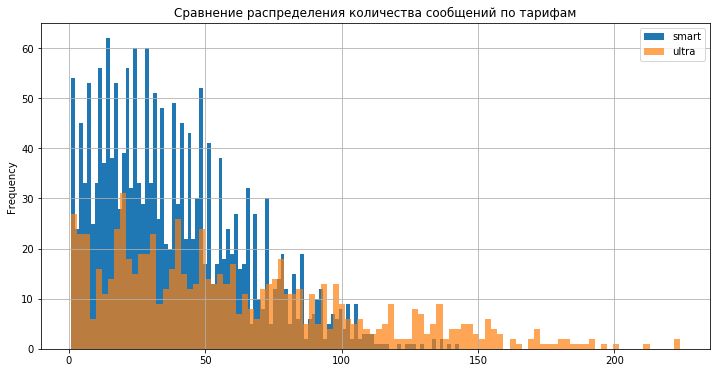

In [49]:
ax1 = (full_pivot
       .query('tariff == "smart"')
       .count_sms
       .plot(kind='hist',
             bins=100, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='smart',
             title='Сравнение распределения количества сообщений по тарифам'))

ax2 = (full_pivot
       .query('tariff == "ultra"')
       .count_sms
       .plot(kind='hist', 
             bins=100, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='ultra'))
plt.show()

Количество отправленных сообщений распределены по Пуассону. Видим на обоих тарифах количество сообщений активно сокращается к 120, однако на тарифе ультра после 120 сообщений продолжается небольшая активность.

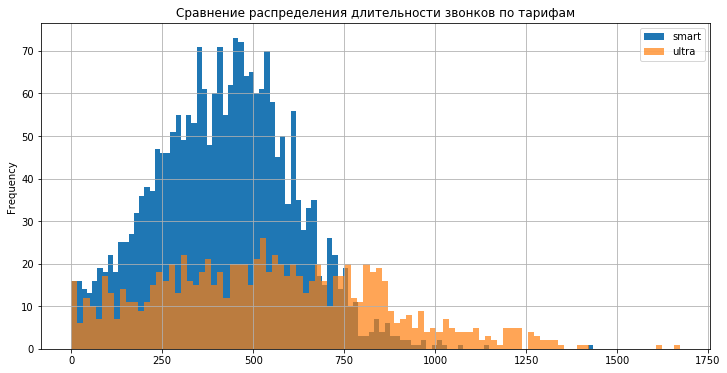

In [50]:
ax1 = (full_pivot
       .query('tariff == "smart"')
       .sum_call_duration
       .plot(kind='hist',
             bins=100, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='smart',
             title='Сравнение распределения длительности звонков по тарифам'))

ax2 = (full_pivot
       .query('tariff == "ultra"')
       .sum_call_duration
       .plot(kind='hist', 
             bins=100, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='ultra'))
plt.show()

Длительности звонков распределены нормально, на тарифе ультра диаграмма сглаженнее, чем на тарифе смарт.

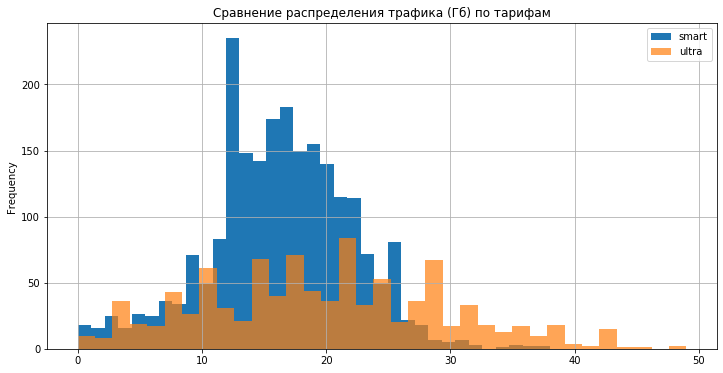

In [51]:
ax1 = (full_pivot
       .query('tariff == "smart"')
       .sum_gb
       .plot(kind='hist',
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='smart',
             title='Сравнение распределения трафика (Гб) по тарифам'))

ax2 = (full_pivot
       .query('tariff == "ultra"')
       .sum_gb
       .plot(kind='hist', 
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='ultra'))
plt.show()

Объем трафика распределен нормально, на тарифе ультра диаграмма сглаженнее, чем на тарифе смарт.

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

**Нулевая гипотеза** **H₀**: средняя выручка пользователей тарифов Ультра равна средней выручки пользоватлей тарифов Смарт.

**Альтернативная гипотеза** **H₁**: средняя выручка пользователей тарифов Ультра не равна средней выручки пользоватлей тарифов Смарт.


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind

cредняя выручка ultra:  2068.5
cредняя выручка smart:  1252.95
p-значение: 4.5028179927391496e-13
Отвергаем нулевую гипотезу


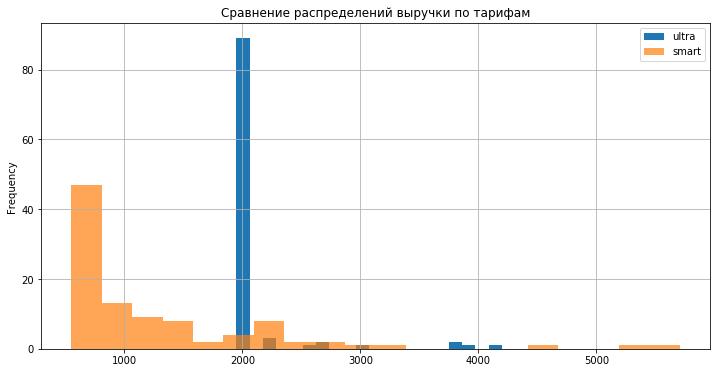

In [55]:
ultra = full_pivot.query('tariff == "ultra"').cost.dropna().sample(n=100)

smart = full_pivot.query('tariff == "smart"').cost.dropna().sample(n=100)

print('cредняя выручка ultra: ', pd.Series(ultra).mean())
print('cредняя выручка smart: ', pd.Series(smart).mean())

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(ultra, smart) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
ax1 = (ultra
       .plot(kind='hist',
             bins=20, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='ultra',
             title='Сравнение распределений выручки по тарифам'))

ax2 = (smart
       .plot(kind='hist', 
             bins=20, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='smart'))
plt.show()

Средние выручки тарифов существенно отличаются.


- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

**Нулевая гипотеза** **H₀**: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

**Альтернативная гипотеза** **H₁**: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов

cредняя выручка ultra:  1526.0975
cредняя выручка smart:  1531.94
p-значение: 0.9138127020330931
Не получилось отвергнуть нулевую гипотезу


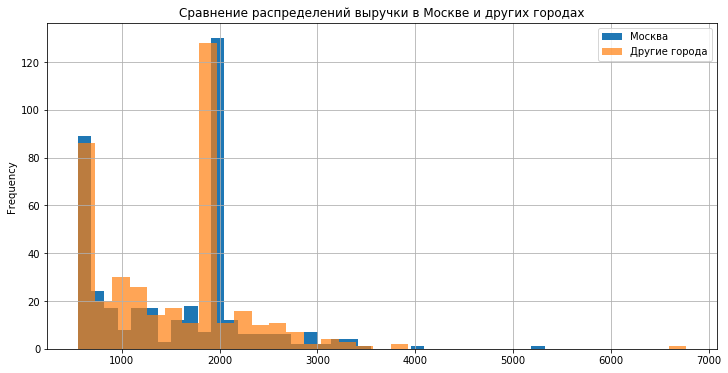

In [59]:
Moscow = full_pivot.query('city == "Москва"').cost.dropna().sample(n=400)

Other = full_pivot.query('city != "Москва"').cost.dropna().sample(n=400)

print('cредняя выручка ultra: ', pd.Series(Moscow).mean())
print('cредняя выручка smart: ', pd.Series(Other).mean())

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(Moscow, Other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
ax1 = (Moscow
       .plot(kind='hist',
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='Москва',
             title='Сравнение распределений выручки в Москве и других городах'))

ax2 = (Other
       .plot(kind='hist', 
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='Другие города'))
plt.show()

Средние выручки пользователей Москвы и других городов одинаковы. С вероятностью 90% можно получить такое или большее отклонение.

**Вывод** 

После проверки гипотез получили, что средние выручки тарифов Ультра и Смарт отличаются существенно p значение низкое. Средние выручки пользователей Москвы и других городов различны но не существенно, p значение близко к критичному уровню значимости.


## Общий вывод

Выполнен предварительный анализ тарифов на небольшой выборке клиентов. Исследованы данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Проанализировано поведение клиентов, выполнены рассчеты средних показателей по звонкам, сообщениям, интернет трафику и полученной выручке.

В результате проведенного исследования можно сказать, что выручки пользователей тарифа Ультра значительно выше выручки тарифа Смарт. Для корректировки рекламного бюджета стоит сделать больший упор на Ультра тариф, выручка в среднем превышает тариф Смарт в 3 раза. 

Различия в выручке Москвы и других регионов есть, но не столь значимы как различия между тарифами. 

